### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

In [3]:
# converting color mode from BGR to RGB and displaying the image as matplotlib figure
def matplotlib_imshow_bgr2rgb(img_title="", mat_img=None, fig_h=7):

    # tinkering with size
    try:
        img_width, img_height = mat_img.shape[0], mat_img.shape[1]
        aspect_ratio = img_width/img_height
        plt.figure(figsize=(fig_h*aspect_ratio, fig_h))
    except AttributeError:
        print("None Type image. Correct_syntax is, matplotlib_imshow_bgr2rgb(img_title, mat_img, fig_h).")

    # actual code for displaying the image
    plt.imshow(cv.cvtColor(mat_img, cv.COLOR_BGR2RGB))
    plt.title(img_title)
    plt.show()
    

## Image Transformation Operations

In [4]:
cat_img = cv.imread("cat.jpeg")

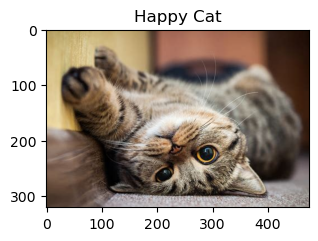

In [5]:
matplotlib_imshow_bgr2rgb("Happy Cat", cat_img, 5)

- ### Rotating an Image

A *2x3 transformation matrix* is required for scaled rotation with adjustable center of rotation (so that you can rotate at any location you prefer). This transformation matrix is obtained by the `cv.getRotationMatrix2D()` function and the output of this function is fed to the `cv.warpAffine()` function.

> **The `cv.getRotationMatrix2D(center, angle, scale)` function**

The modified transformation matrix is given by, <img src="get_rotation_matrix_2D.png">

<u>Function Parameters</u>
- center: Center of rotation in the form of (x, y).
- angle: Angle of rotation in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
- scale: Image scaling factor.

> **The `cv.warpAffine(src, M, dsize)` function**

This function is used to apply the transformation matrix to the input image.

<u>Function Parameters</u>
- src: input imgae
- M: 2x3 transformation matrix
- dsize: output image size in the form of (width, height)

In [6]:
# rotating the demo_img by 90 degrees CW
img_w = cat_img.shape[0]
img_h = cat_img.shape[1]
image_center = (img_w/2), (img_h/2)
transformation_matrix = cv.getRotationMatrix2D(image_center, 90, 0.8)
rotated_img = cv.warpAffine(cat_img, transformation_matrix, (img_w, img_h))

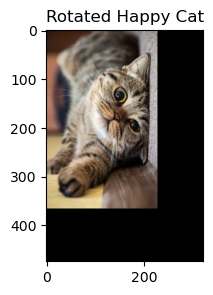

In [7]:
matplotlib_imshow_bgr2rgb("Rotated Happy Cat", rotated_img, 3)

##### Flipping an Image

we can do this by rotating the image by 180 degrees or using the `cv.flip(src, flipCode)` method.

<u>Function Parameters</u>
- src: input image
- flip code: A flag to specify how to flip the image array. 
    - 0 means flipping around the x-axis 
    - positive value (for example, 1) means flipping around y-axis
    - Negative value (for example, -1) means flipping around both axes

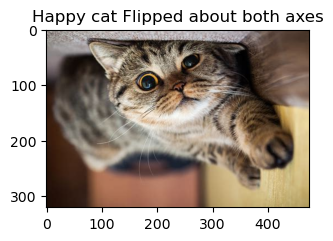

In [8]:
flipped_img = cv.flip(cat_img, -1)
matplotlib_imshow_bgr2rgb("Happy cat Flipped about both axes", flipped_img, 5)

- ### Perspective Transformation of an Image

A 3x3 transformation matrix is required. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and their corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function `cv.getPerspectiveTransform()`. Then apply `cv.warpPerspective()` with this 3x3 transformation matrix.

<img src="perspective_transformation.png" width=500 height=300>

> **The `cv.getPerspectiveTransform(points_on_input_img, points_on_output_img)` function**

<u>Function Parameters</u>
- points_on_input_img: 4 points on the input image (out of which 3 should not be colinear) to base the perspective shift on.
- points_on_output_img: 4 points on the output image corresponding to the points of the input image.

> **The `cv.warpPerspective(src, T, dsize)` function**

<u>Function Parameters</u>
- src: input imgae
- T: 3x3 transformation matrix
- dsize: output image size in the form of (width, height)

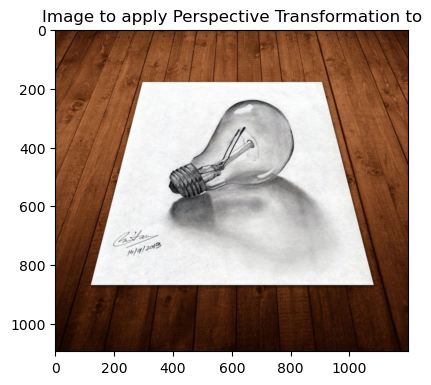

In [9]:
# example of perspective transformation
img_3d_bulb = cv.imread("3d_bulb.jpeg")
matplotlib_imshow_bgr2rgb("Image to apply Perspective Transformation to", img_3d_bulb, 5)

In [10]:
img_3d_bulb.shape

(1093, 1200, 3)

In [11]:
points_on_the_source_img = np.float32([[300, 190], [910, 190], [130, 850], [1070, 850]])
to_be_points_on_the_transformed_img = np.float32([[0, 0], [700, 0], [0, 800], [700, 800]])

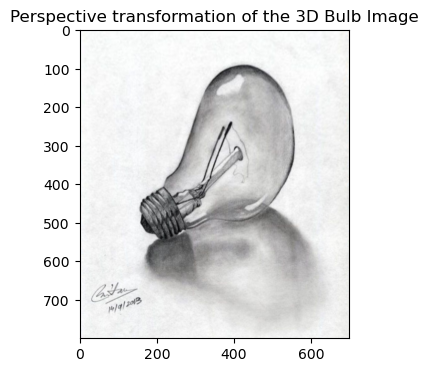

In [12]:
perspective_transformation_matrix = cv.getPerspectiveTransform(points_on_the_source_img, to_be_points_on_the_transformed_img)
perspective_transformed_img = cv.warpPerspective(img_3d_bulb, perspective_transformation_matrix, (700, 800))
matplotlib_imshow_bgr2rgb("Perspective transformation of the 3D Bulb Image", perspective_transformed_img, 4)